In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data (1).jsonl to data (1).jsonl


In [ ]:
filename = list(uploaded.keys())[0]
print("Using file:", filename)


Using file: data (1).jsonl


In [ ]:
import json
import pandas as pd

rows = []

with open(filename, 'r', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            rows.append(json.loads(line)["data"])

df = pd.DataFrame(rows)
df.shape


(8799, 114)

In [ ]:
df.head()


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,post_hint,crosspost_parent_list,url_overridden_by_dest,preview,crosspost_parent,is_gallery,media_metadata,gallery_data,author_cakeday,link_flair_template_id
0,None,Anarchism,"What you are reading, watching, or listening ...",t2_6l4z3,False,None,0,False,What Are You Reading/Book Club Tuesday,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,Anarchism,,t2_4vt6saq5,False,None,0,False,"""WTF is Social Ecology?"" by Usufruct Collective",[],...,link,"[{'approved_at_utc': None, 'subreddit': 'Commu...",https://usufructcollective.wordpress.com/2025/...,{'images': [{'source': {'url': 'https://extern...,t3_1irrbvc,NaN,NaN,NaN,NaN,NaN
2,None,Anarchism,I am an anarcho-nihilist and i am reading simi...,t2_1h2y206upy,False,None,0,False,Who do you think is the most powerful/popular ...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,Anarchism,"Ayo, im an anarchist but perhaps not the most ...",t2_83t23peb,False,None,0,False,Not paying student loans or taxes,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,Anarchism,Looking for videos/podcasts/writing where folk...,t2_9haan,False,None,0,False,Recommendations for intellectual debate content,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Columns: 114 entries, approved_at_utc to link_flair_template_id
dtypes: bool(28), float64(7), int64(8), object(71)
memory usage: 6.0+ MB


In [ ]:
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df["created_utc"].head()


,created_utc
0,2025-02-18 06:01:00
1,2025-02-17 18:47:05
2,2025-02-17 01:57:39
3,2025-02-17 18:05:32
4,2025-02-17 16:57:44


In [ ]:
print("Total posts:", len(df))
print("\nTop subreddits:")
print(df["subreddit"].value_counts().head(10))


Total posts: 8799

Top subreddits:
subreddit
neoliberal             993
politics               993
worldpolitics          989
socialism              985
Liberal                984
Conservative           980
Anarchism              974
democrats              932
Republican             853
PoliticalDiscussion    116
Name: count, dtype: int64


In [ ]:
df.shape

(8799, 114)

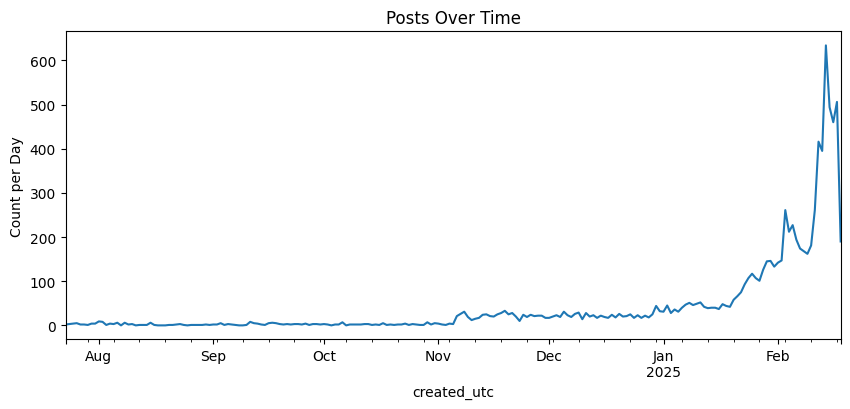

In [ ]:
import matplotlib.pyplot as plt

df.set_index("created_utc").resample("D").size().plot(figsize=(10,4))
plt.title("Posts Over Time")
plt.ylabel("Count per Day")
plt.show()


In [ ]:
df['domain'] = df['url'].str.extract(r'https?://([^/]+)/')
df['domain'].value_counts().head(20)


,count
domain,
www.reddit.com,2267
i.redd.it,1466
youtube.com,195
youtu.be,145
www.nytimes.com,145
v.redd.it,140
thehill.com,139
apnews.com,124
www.theguardian.com,113


In [ ]:
import re
from collections import Counter

titles = " ".join(df['title'].dropna()).lower()
titles = re.sub('[^a-z ]', ' ', titles)

word_counts = Counter(titles.split())
word_counts.most_common(20)


[('the', 3414),
 ('to', 2738),
 ('of', 2045),
 ('trump', 1913),
 ('s', 1867),
 ('and', 1515),
 ('in', 1504),
 ('a', 1437),
 ('for', 1162),
 ('is', 1104),
 ('on', 933),
 ('you', 569),
 ('i', 554),
 ('with', 545),
 ('what', 544),
 ('are', 529),
 ('it', 520),
 ('this', 472),
 ('from', 447),
 ('that', 431)]

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['title'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['sentiment'].describe()


,sentiment
count,8799.000000
mean,-0.039175
std,0.363639
min,-0.972300
25%,-0.296000
50%,0.000000
75%,0.075800
max,0.970900


In [ ]:
df.groupby('subreddit')['sentiment'].mean().sort_values(ascending=False).head(10)


,sentiment
subreddit,
PoliticalDiscussion,0.067592
worldpolitics,0.027315
Liberal,-0.009125
Anarchism,-0.012418
socialism,-0.029115
Conservative,-0.037408
democrats,-0.046131
neoliberal,-0.062936
politics,-0.100359


In [ ]:
domain_df = df[['domain','subreddit','created_utc','title','sentiment','url']].copy()

# Remove rows where domain is null
domain_df = domain_df[domain_df['domain'].notna()]

domain_df.head()


,domain,subreddit,created_utc,title,sentiment,url
0,www.reddit.com,Anarchism,2025-02-18 06:01:00,What Are You Reading/Book Club Tuesday,0.0000,https://www.reddit.com/r/Anarchism/comments/1i...
1,usufructcollective.wordpress.com,Anarchism,2025-02-17 18:47:05,"""WTF is Social Ecology?"" by Usufruct Collective",-0.6739,https://usufructcollective.wordpress.com/2025/...
2,www.reddit.com,Anarchism,2025-02-17 01:57:39,Who do you think is the most powerful/popular ...,0.0000,https://www.reddit.com/r/Anarchism/comments/1i...
3,www.reddit.com,Anarchism,2025-02-17 18:05:32,Not paying student loans or taxes,0.0000,https://www.reddit.com/r/Anarchism/comments/1i...
4,www.reddit.com,Anarchism,2025-02-17 16:57:44,Recommendations for intellectual debate content,0.5106,https://www.reddit.com/r/Anarchism/comments/1i...


In [ ]:
sample_domain = "youtube.com"

filtered = domain_df[domain_df['domain'] == sample_domain]
filtered.head()


,domain,subreddit,created_utc,title,sentiment,url
361,youtube.com,Anarchism,2025-01-22 16:18:12,Rattling the Cages video series. Learning from...,0.0000,https://youtube.com/playlist?list=PLfp8FRTvfDT...
383,youtube.com,Anarchism,2025-01-21 07:08:07,On the Purpose of Unemployment - Michael Parenti,-0.4404,https://youtube.com/watch?v=QKw3LuUM1jY&amp;si...
403,youtube.com,Anarchism,2025-01-19 07:57:47,The Offending Article,-0.5106,https://youtube.com/watch?v=QqjIlfG4yvA&amp;si...
418,youtube.com,Anarchism,2025-01-18 02:10:09,The adjuster,0.0000,https://youtube.com/shorts/AshSX7Unz28?si=Dhj-...
435,youtube.com,Anarchism,2025-01-15 16:09:07,The Birth of the Anarchist Movement,0.0000,https://youtube.com/watch?v=w5c1TWMV7Mg&amp;si...


In [ ]:
def get_domain_data(domain_name):
    subset = domain_df[domain_df['domain'].str.contains(domain_name, case=False, na=False)]
    return subset


In [ ]:
test = get_domain_data("youtube.com")
test.head()


,domain,subreddit,created_utc,title,sentiment,url
11,www.youtube.com,Anarchism,2025-02-16 20:34:36,The Defeatism of Stalinist Arguments,-0.6124,https://www.youtube.com/watch?v=HeqUKS25JXQ
24,www.youtube.com,Anarchism,2025-02-15 23:37:27,"Reading ""1922: The Hong Kong strike""",-0.1280,https://www.youtube.com/watch?v=LRnWWs-1JDE
114,www.youtube.com,Anarchism,2025-02-08 14:14:18,Favorite anti fascist hip hop songs? I'll start,-0.4404,https://www.youtube.com/watch?v=V_-bUEYBRCE
129,www.youtube.com,Anarchism,2025-02-06 22:14:46,"Reading ""What A Strike Is"" by Peter Kropotkin",-0.1280,https://www.youtube.com/watch?v=q7tz5ql0hnU
176,www.youtube.com,Anarchism,2025-02-03 22:27:05,Anarchism in America (1983 Documentary),0.0000,https://www.youtube.com/watch?v=AHGl9a8BcqI&am...


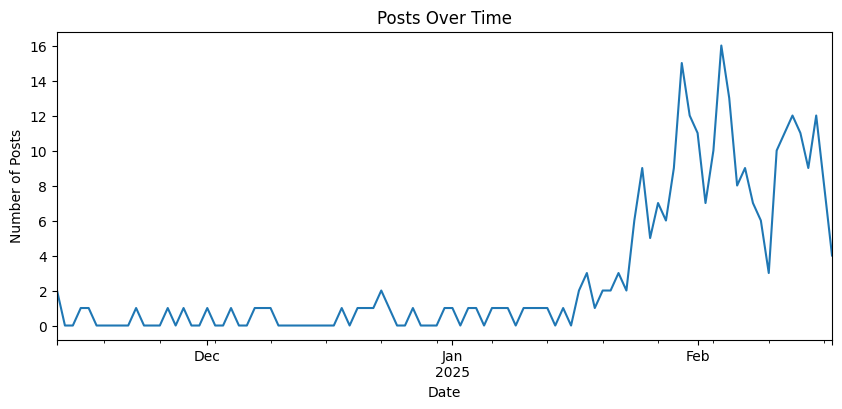

In [ ]:
import matplotlib.pyplot as plt

def plot_time_series(data):
    ts = data.resample('D', on='created_utc').size()

    plt.figure(figsize=(10,4))
    ts.plot()
    plt.title("Posts Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Posts")
    plt.show()

plot_time_series(test)


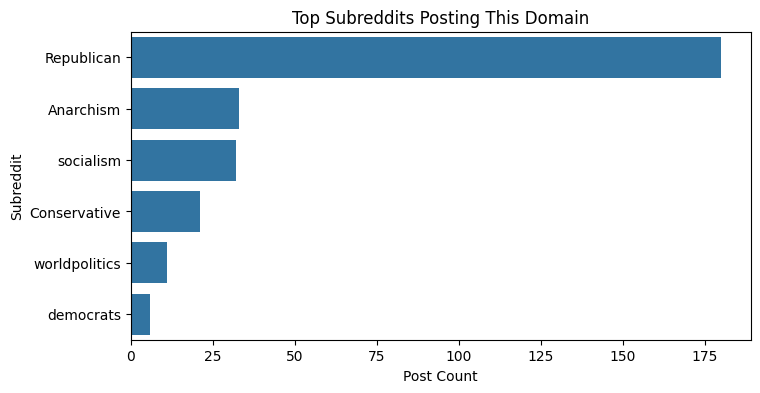

In [ ]:
import seaborn as sns

def plot_subreddit_bar(data):
    counts = data['subreddit'].value_counts().head(10)

    plt.figure(figsize=(8,4))
    sns.barplot(x=counts.values, y=counts.index)
    plt.title("Top Subreddits Posting This Domain")
    plt.xlabel("Post Count")
    plt.ylabel("Subreddit")
    plt.show()

plot_subreddit_bar(test)


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("processed.csv")  # we'll save this next
domain_df = df.copy()

def get_domain_data(domain_name):
    return domain_df[domain_df['domain'].str.contains(domain_name, case=False, na=False)]

def plot_time_series(data):
    ts = data.resample('D', on='created_utc').size()
    fig, ax = plt.subplots(figsize=(10,4))
    ts.plot(ax=ax)
    ax.set_title("Posts Over Time")
    return fig

def plot_subreddit_bar(data):
    counts = data['subreddit'].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(8,4))
    sns.barplot(x=counts.values, y=counts.index, ax=ax)
    ax.set_title("Top Subreddits Sharing This Domain")
    return fig

st.title("Link Spread Insights Dashboard")

domain_input = st.text_input("Enter a domain (e.g., cnn.com):")

if domain_input:
    filtered = get_domain_data(domain_input)
    st.write(f"Results found: {len(filtered)}")

    st.pyplot(plot_time_series(filtered))
    st.pyplot(plot_subreddit_bar(filtered))


Writing app.py


In [ ]:
domain_df.to_csv("processed.csv", index=False)


In [ ]:
%%writefile requirements.txt
streamlit
pandas
matplotlib
seaborn
plotly
networkx
pyvis
nltk


Writing requirements.txt


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.8 MB/s eta 0:00:00


In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.170.220:8501

  Stopping...
